# Structure

In [1]:
# For visualization
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

### Feature Descriptions

- **RowNumber**: Index of the row in the dataset (not useful for modeling).

- **CustomerId**: Unique ID for the customer.

- **Surname**: Customer's last name (not predictive).

- **CreditScore**: Customer’s credit score (higher is better).

- **Geography**: Country of the customer (e.g., France, Spain, Germany).

- **Gender**: Gender of the customer: Male or Female.

- **Age**: Age of the customer in years.

- **Tenure**: Number of years the customer has stayed with the bank.

- **Balance**: Account balance of the customer.

- **NumOfProducts**: Number of bank products the customer uses (e.g., savings, credit card).

- **HasCrCard**: Whether the customer has a credit card (1 = Yes, 0 = No).

- **IsActiveMember**: Whether the customer is active (1 = Active, 0 = Inactive).

- **EstimatedSalary**: Estimated yearly income of the customer.

- **Exited**: Target variable: whether the customer left the bank (1 = Yes, 0 = No).


In [13]:
df = pd.read_csv("../data/raw/churn_modelling.csv")

rows = df.shape[0]
print(f"The dataset has {rows} rows.")

print("\nThis are the first 5:")
df.head()

The dataset has 10000 rows.

This are the first 5:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Check columns list and missing values
print(f"Number of missing values in each row:")
df.isnull().sum()

Number of missing values in each row:


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are no missing values!!

In [4]:
# Let's see what attributes are important for training
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

We can see that the fist three are personal attributes which identify the customer, not interesting for us.

In [5]:
# So we can drop them
df = df.drop(["RowNumber","CustomerId","Surname"], axis = 1)

In [6]:
# Check the dataframe
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# Now we are going to see the data types in order to understand better the attributes 
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Data analysis
¿How the attributes relate to the "Exited" target?

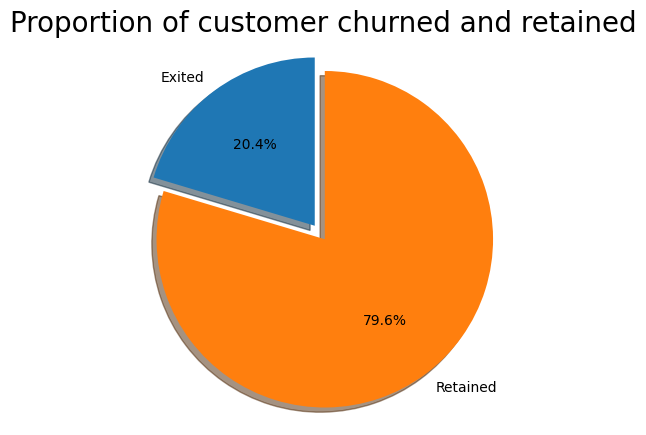

In [8]:
labels = "Exited", "Retained"
sizes = [df.Exited[df["Exited"] == 1].count(), df.Exited[df["Exited"] == 0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize = (7,5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis("equal")
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()
    

So about 20% of the customers have churned.  20% is a small number, we need to ensure that the chosen model does predict with great accuracy 
this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

<Axes: xlabel='IsActiveMember', ylabel='count'>

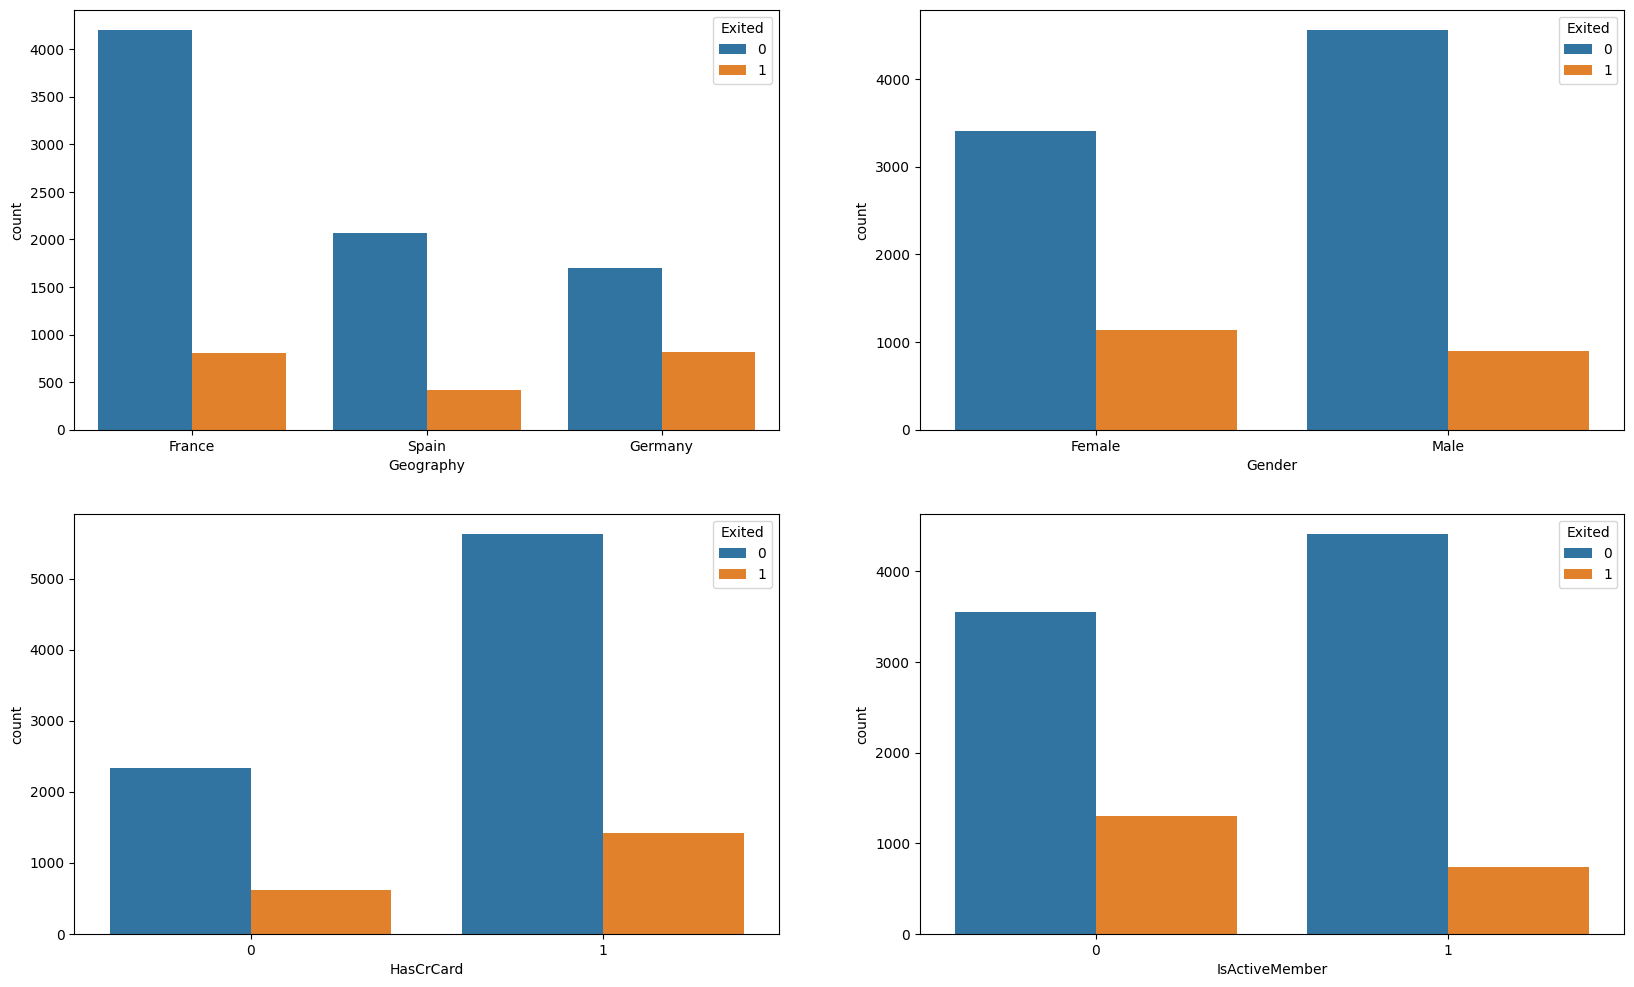

In [9]:
# First we are going to analyze the categorical features
fig, axarr = plt.subplots(2, 2, figsize = (20, 12))
sns.countplot(x = "Geography", hue = "Exited", data = df, ax = axarr[0][0])
sns.countplot(x = "Gender", hue = "Exited", data = df, ax = axarr[0][1])
sns.countplot(x = "HasCrCard", hue = "Exited", data = df, ax = axarr[1][0])
sns.countplot(x = "IsActiveMember", hue = "Exited", data = df, ax = axarr[1][1])

We note the following:

1. Majority of the data is from people from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.
2. Female customers churn more than male customers.
3. Majority of customers who churn have a credit card, although there are more customers which have credit card.
4. Inactive costumers churn more than active ones.

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

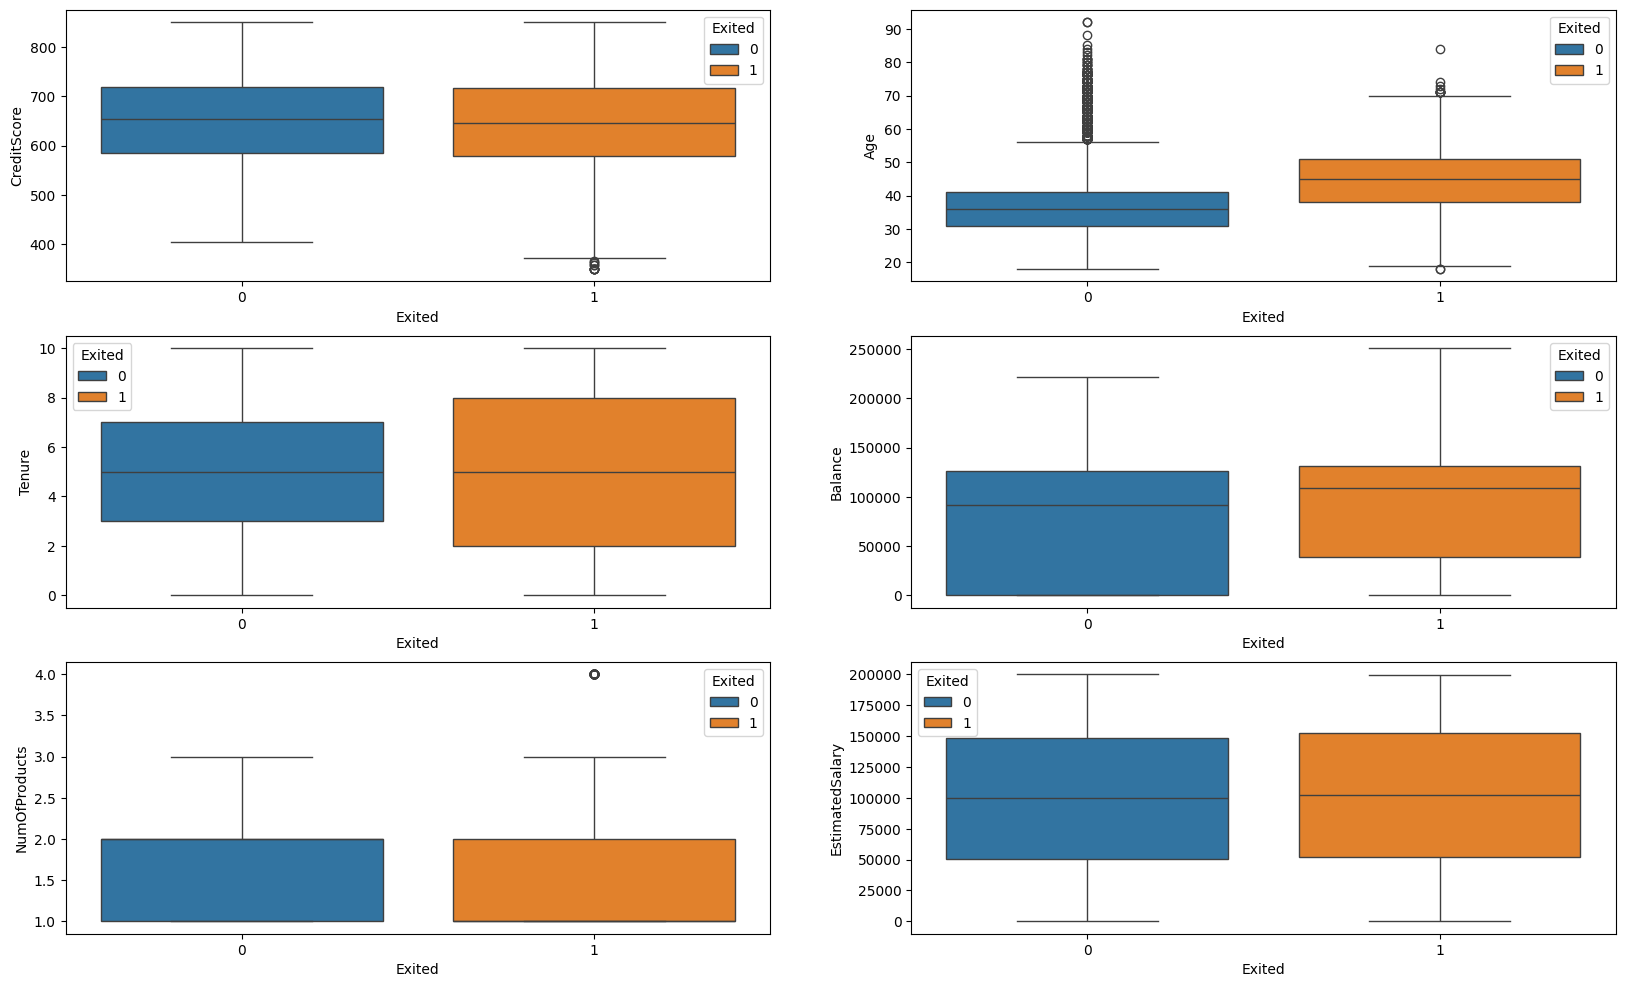

In [11]:
# Now we are going to analyze the continuous features

fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

We note the following:

1. No significant difference.
2. The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories.
3. The clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.
4. Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.
5. No significant difference.
6. No significant difference.

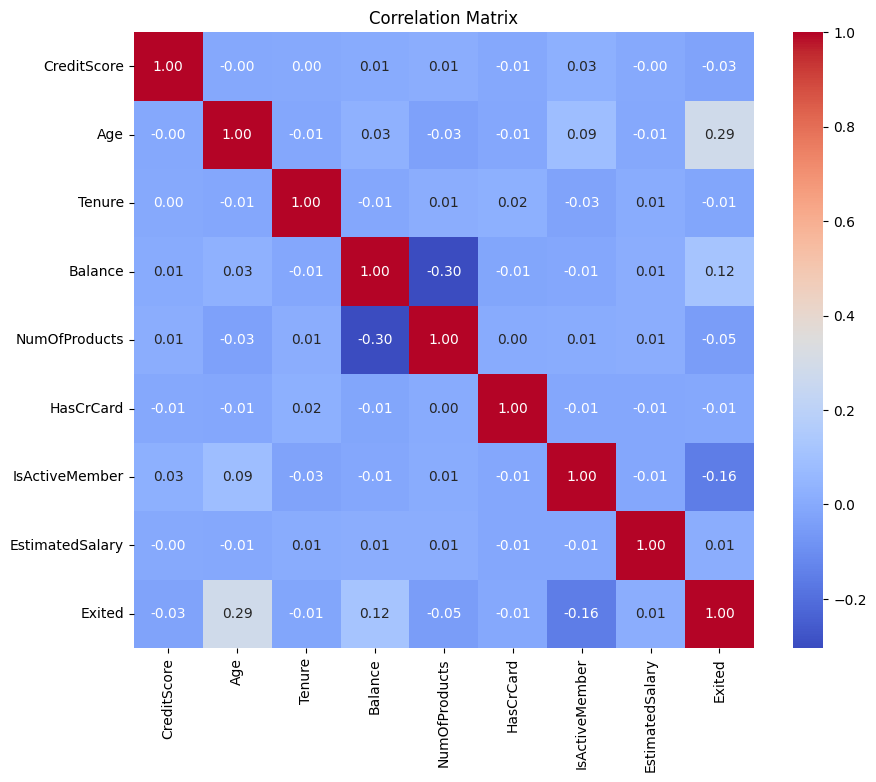

In [12]:
# Now we are going to see the correlation matrix to reafirm the statements we have done.
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Correlation Matrix Insights

- **Age** is moderately correlated with churn, suggesting that older customers are more likely to leave the bank.
- **IsActiveMember** shows a weak negative correlation with churn, indicating that active customers are slightly less likely to exit.
- Other features like **CreditScore**, **Tenure**, **NumOfProducts**, **HasCrCard**, and **EstimatedSalary** exhibit very weak or no linear correlation with the target variable.
- There is a moderate negative correlation between **Balance** and **NumOfProducts**, which may indicate that customers with multiple products tend to maintain lower balances.

Overall, correlations with the target variable are weak, implying that non-linear models or feature interactions might be necessary to capture more complex patterns.
